In [178]:
import pandas as pd
from matplotlib import pyplot as plt

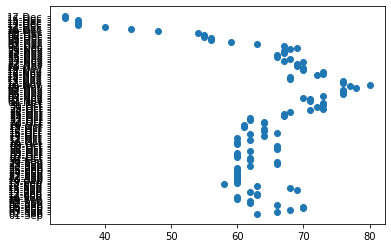

In [179]:
df = pd.read_csv('potato.csv')
array=df['p/kg'].tolist()
array
plt.scatter(array,df['Date'])
plt.show()

In [180]:
first_label=(df.loc[1][1]-df.loc[0][1])/df.loc[0][1]
first_label

0.047619047619047616

In [181]:
labels=df['p/kg']
relative_change=[]
temp=[]
for i in range(1,len(labels)):
    result=(labels[i]-labels[i-1])/labels[i-1]
    relative_change.append(result)
    label=-2
    if result>0:
        label=1
    elif result==0:
        label=0
    else:
        label=-1
    temp.append(label)
relative_change.append(0)
new_temp = [0]+temp
new_temp

[0,
 1,
 1,
 1,
 0,
 -1,
 -1,
 0,
 -1,
 0,
 1,
 0,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 -1,
 0,
 -1,
 0,
 0,
 1,
 1,
 0,
 0,
 -1,
 0,
 1,
 -1,
 1,
 -1,
 1,
 -1,
 0,
 -1,
 0,
 1,
 0,
 -1,
 0,
 1,
 0,
 1,
 1,
 1,
 -1,
 1,
 0,
 -1,
 0,
 -1,
 1,
 1,
 0,
 0,
 1,
 -1,
 1,
 -1,
 0,
 -1,
 0,
 1,
 1,
 0,
 -1,
 0,
 -1,
 0,
 1,
 -1,
 1,
 -1,
 0,
 1,
 0,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 0,
 -1,
 0,
 -1,
 -1,
 -1,
 -1,
 -1,
 0,
 0,
 0,
 -1,
 0]

In [236]:
df['yms']=new_temp
df['relative_change']=relative_change

df.tail(20)


,Date,p/kg,yms,relative_change
88,28-Nov,67,0,0.014925
89,29-Nov,68,1,0.014706
90,30-Nov,69,1,-0.028986
91,01-Dec,67,-1,-0.059701
92,02-Dec,63,-1,-0.063492
93,03-Dec,59,-1,-0.050847
94,04-Dec,56,-1,0.000000
95,05-Dec,56,0,-0.017857
96,06-Dec,55,-1,0.000000
97,07-Dec,55,0,-0.018182


0      0
1      1
2      1
3      1
4      0
      ..
103    0
104    0
105    0
106   -1
107    0
Name: yms, Length: 108, dtype: int64

In [238]:
from sklearn.model_selection import train_test_split
df2=df.iloc[:93]
training_data,testing_data=train_test_split(df,test_size=0.125,shuffle=False)
print(f"No. of training examples: {training_data.shape[0]}")
print(f"No. of testing examples: {testing_data.shape[0]}")
# training_data.tail(5)

No. of training examples: 94
No. of testing examples: 14


,Date,p/kg,yms,relative_change
89,29-Nov,68,1,0.014706
90,30-Nov,69,1,-0.028986
91,01-Dec,67,-1,-0.059701
92,02-Dec,63,-1,-0.063492
93,03-Dec,59,-1,-0.050847


In [240]:
X_train,Y_train,X_test,Y_test=training_data['p/kg'],training_data['yms'],testing_data['p/kg'],testing_data['yms']
# X_train=X_train.append(pd.Series([65],index=[92]))
# X_test=X_test[1:]
X_train.tail(5)

89    68
90    69
91    67
92    63
93    59
Name: p/kg, dtype: int64

In [244]:
import numpy as np
def euclidean_dist(X_test, X_train):
    num_test = X_test.shape[0]
    num_train = X_train.shape[0]
    dists = np.zeros((num_test, num_train))
     
    for i in range(num_test):
        for j in range(num_train):
            
            dists[i, j] = np.sqrt(np.square(X_test.iloc[i])+np.square(X_train.iloc[j]))


    return dists


dicts=euclidean_dist(X_test,X_train)


In [245]:
# k neareast neighbour
def find_k_neighbors(dists, Y_train, k):
    num_test = dists.shape[0]
    neighbors = np.zeros((num_test, k))
    sorted_idx = dists.argsort(axis=1)
    for i in range(num_test):
        neighbors[i] = Y_train[sorted_idx[i][:k]]
    return neighbors

neighbours=find_k_neighbors(dicts,Y_train,5)
neighbours

array([[-1., -1.,  1.,  0.,  0.],
       [-1., -1.,  1.,  0.,  0.],
       [-1., -1.,  1.,  0.,  0.],
       [-1., -1.,  1.,  0.,  0.],
       [-1., -1.,  1.,  0.,  0.],
       [-1., -1.,  1.,  0.,  0.],
       [-1., -1.,  1.,  0.,  0.],
       [-1., -1.,  1.,  0.,  0.],
       [-1., -1.,  1.,  0.,  0.],
       [-1., -1.,  1.,  0.,  0.],
       [-1., -1.,  1.,  0.,  0.],
       [-1., -1.,  1.,  0.,  0.],
       [-1., -1.,  1.,  0.,  0.],
       [-1., -1.,  1.,  0.,  0.]])

In [246]:
def knn_predict(X_test, X_train, Y_train, k):
    num_test = X_test.shape[0]
    Y_pred = np.zeros(num_test, dtype=int)
    dists = euclidean_dist(X_test, X_train)
    print(X_test.iloc[0])
    neighbors = find_k_neighbors(dists, Y_train, k)
    print(neighbors)
    for i in range(num_test):
        
        value, counts = np.unique(neighbors[i], return_counts=True)
        idx = np.argmax(counts)
        Y_pred[i] = value[idx]
        
        if X_test.shape[0]>0:
            
            new_dist=euclidean_dist(pd.Series(X_test.iloc[0]),X_train)
           
            np.append(dicts,new_dist[0])
            
            Y_train=Y_train.append(pd.Series([Y_pred[i]],index=[X_train.shape[0]]))
            # print(Y_train.tail(5))
            neighbors = find_k_neighbors(dists, Y_train, k)
            X_train=X_train.append(pd.Series([X_test.iloc[0]],index=[X_train.shape[0]]))
            X_test=X_test[1:]
            
    
    return Y_pred

k=5
Y_pred = knn_predict(X_test, X_train, Y_train, k)

56
[[-1. -1.  1.  0.  0.]
 [-1. -1.  1.  0.  0.]
 [-1. -1.  1.  0.  0.]
 [-1. -1.  1.  0.  0.]
 [-1. -1.  1.  0.  0.]
 [-1. -1.  1.  0.  0.]
 [-1. -1.  1.  0.  0.]
 [-1. -1.  1.  0.  0.]
 [-1. -1.  1.  0.  0.]
 [-1. -1.  1.  0.  0.]
 [-1. -1.  1.  0.  0.]
 [-1. -1.  1.  0.  0.]
 [-1. -1.  1.  0.  0.]
 [-1. -1.  1.  0.  0.]]


In [258]:

k=3
Y_pred = knn_predict(X_test, X_train, Y_train, k)


56
[[-1. -1.  1.]
 [-1. -1.  1.]
 [-1. -1.  1.]
 [-1. -1.  1.]
 [-1. -1.  1.]
 [-1. -1.  1.]
 [-1. -1.  1.]
 [-1. -1.  1.]
 [-1. -1.  1.]
 [-1. -1.  1.]
 [-1. -1.  1.]
 [-1. -1.  1.]
 [-1. -1.  1.]
 [-1. -1.  1.]]


In [259]:
def compute_error_rate(ypred, ytrue):
  
  error_rate=0
  err = 0
  num_test=len(ypred)
  for i in range(num_test):
      err = err + (ypred[i] != ytrue[i])  
  error_rate = err / num_test * 100
  return error_rate
  
ypred=Y_pred.tolist()
ytrue=Y_test.tolist()
print(compute_error_rate(ypred,ytrue))

42.857142857142854


In [249]:
ytrue

[-1, 0, -1, 0, -1, -1, -1, -1, -1, 0, 0, 0, -1, 0]

In [250]:
ypred

[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]

In [194]:
df.iloc[86]

Date                 26-Nov
p/kg                     66
yms                       0
relative_change    0.015152
Name: 86, dtype: object